# Titanic - Machine Learning from disaster

This notebook is created to participate in this Kaggle competition: https://www.kaggle.com/c/titanic/overview.
Currently, the model in the notebook archieves 78.23% accuracy

## 1. Studying the data and preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


traindf = pd.read_csv("train.csv")
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
traindf["Sex"] = traindf["Sex"].map({"male": 0, "female": 1})
traindf = traindf.drop(["PassengerId"], axis=1)
traindf = traindf.drop(["Name"], axis=1)
traindf = traindf.drop_duplicates()

df_dummies = pd.get_dummies(traindf['Embarked'])
traindf = pd.concat([traindf, df_dummies], axis=1)
traindf = traindf.drop(["Embarked"], axis=1)
traindf['Cabin'] = traindf['Cabin'].isna().apply(lambda x: 0 if x else 1)

traindf= traindf.drop(["Ticket"],axis=1)

traindf.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
886,0,2,0,27.0,0,0,13.00,0,0,0,1
887,1,1,1,19.0,0,0,30.00,1,0,0,1
888,0,3,1,NaN,1,2,23.45,0,0,0,1
889,1,1,0,26.0,0,0,30.00,1,1,0,0
890,0,3,0,32.0,0,0,7.75,0,0,1,0


In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    int64  
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Fare      876 non-null    float64
 7   Cabin     876 non-null    int64  
 8   C         876 non-null    uint8  
 9   Q         876 non-null    uint8  
 10  S         876 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 64.2 KB


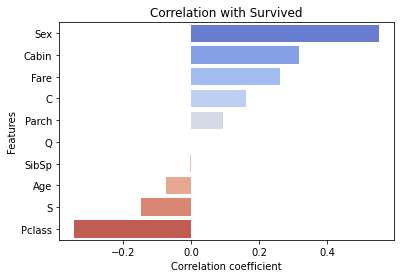

In [4]:
correlations = traindf.corr()['Survived'].sort_values(ascending=False)
correlations = correlations.drop('Survived')

sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation with Survived')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

### Women and child first

In [5]:
from sklearn.impute import KNNImputer

df_knn = traindf[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']].copy()
original_age = traindf['Age'].copy()
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
traindf.loc[traindf['Age'].isna(), 'Age'] = df_imputed[traindf['Age'].isna(), 0]

In [6]:
missing_cabin = traindf[traindf['Sex'] == 0]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Male): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Sex'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Female): {survival_rate_missing_cabin:.2%}")

Survival rate (Male): 18.63%
Survival rate (Female): 74.92%


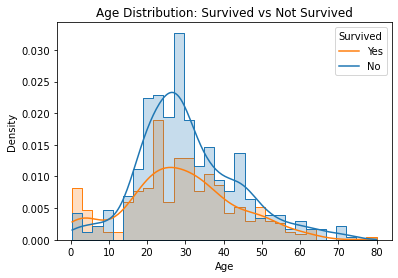

In [7]:
sns.histplot(data=traindf, x='Age', hue='Survived', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

In [8]:
traindf.loc[traindf["Age"] <= 15, "Age"] = 0
traindf.loc[(traindf["Age"] > 15) & (traindf["Age"] <= 27), "Age"] = 1
traindf.loc[(traindf["Age"] > 27) & (traindf["Age"] <= 40), "Age"] = 2
traindf.loc[(traindf["Age"] > 40) & (traindf["Age"] <= 55), "Age"] = 3
traindf.loc[traindf["Age"] > 55, "Age"] = 4

In [9]:
missing_cabin = traindf[traindf['Age'] == 0]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Children: Total:{len(missing_cabin)} Survival rate: {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Age'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Teenagers: Total:{len(missing_cabin)} Survival rate: {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Age'] == 2]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Young-adults: Total:{len(missing_cabin)} Survival rate: {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Age'] == 3]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Adults: Total:{len(missing_cabin)} Survival rate: {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Age'] == 4]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Old people: Total:{len(missing_cabin)} Survival rate: {survival_rate_missing_cabin:.2%}")

Children: Total:83 Survival rate: 59.04%
Teenagers: Total:308 Survival rate: 36.36%
Young-adults: Total:305 Survival rate: 36.39%
Adults: Total:140 Survival rate: 37.14%
Old people: Total:40 Survival rate: 30.00%


In [10]:
def priority_group(row):
    if (row['Sex'] == 1) or (row['Age'] == 0):
        return 1
    else:
        return 0
traindf['PriorityGroup'] = traindf.apply(priority_group, axis=1)

missing_cabin = traindf[traindf['PriorityGroup'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Total survival rate for women and children: {survival_rate_missing_cabin:.2%}")

Total survival rate for women and children: 72.33%


In [11]:
traindf['Companion'] = traindf["SibSp"] + traindf["Parch"]
traindf = traindf.drop("SibSp", axis=1)
traindf = traindf.drop("Parch", axis=1)

missing_cabin = traindf[(traindf['Companion'] != 0) & (traindf['PriorityGroup'] == 1)]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate for priority group with companion: {survival_rate_missing_cabin:.2%}")
missing_cabin = traindf[(traindf['Companion'] == 0) & (traindf['PriorityGroup'] == 1)]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate for priority group without companion: {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[(traindf['Companion'] != 0) & (traindf['PriorityGroup'] == 0)]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate for non-priority group with companion: {survival_rate_missing_cabin:.2%}")
missing_cabin = traindf[(traindf['Companion'] == 0) & (traindf['PriorityGroup'] == 0)]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate for non-priority group without companion: {survival_rate_missing_cabin:.2%}")

traindf.tail()

Survival rate for priority group with companion: 69.23%
Survival rate for priority group without companion: 77.78%
Survival rate for non-priority group with companion: 18.70%
Survival rate for non-priority group without companion: 15.27%


,Survived,Pclass,Sex,Age,Fare,Cabin,C,Q,S,PriorityGroup,Companion
886,0,2,0,1.0,13.00,0,0,0,1,0,0
887,1,1,1,1.0,30.00,1,0,0,1,1,0
888,0,3,1,1.0,23.45,0,0,0,1,1,3
889,1,1,0,1.0,30.00,1,1,0,0,0,0
890,0,3,0,2.0,7.75,0,0,1,0,0,0


### Other

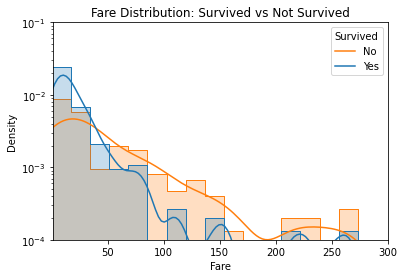

In [12]:
sns.histplot(data=traindf, x='Fare', hue='Survived', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.yscale('log')
plt.title('Fare Distribution: Survived vs Not Survived')
plt.xlim(1, 300) 
plt.ylim(0.0001, 0.1)  

plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [13]:
missing_cabin = traindf[traindf['Cabin'] == 0]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cabin missing): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Cabin'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cabin known): {survival_rate_missing_cabin:.2%}")

Survival rate (Cabin missing): 29.87%
Survival rate (Cabin known): 66.50%


In [14]:
missing_cabin = traindf[traindf['Q'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cherbourg): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['S'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Queenstown): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['C'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Southampton): {survival_rate_missing_cabin:.2%}")

Survival rate (Cherbourg): 38.16%
Survival rate (Queenstown): 33.97%
Survival rate (Southampton): 54.55%


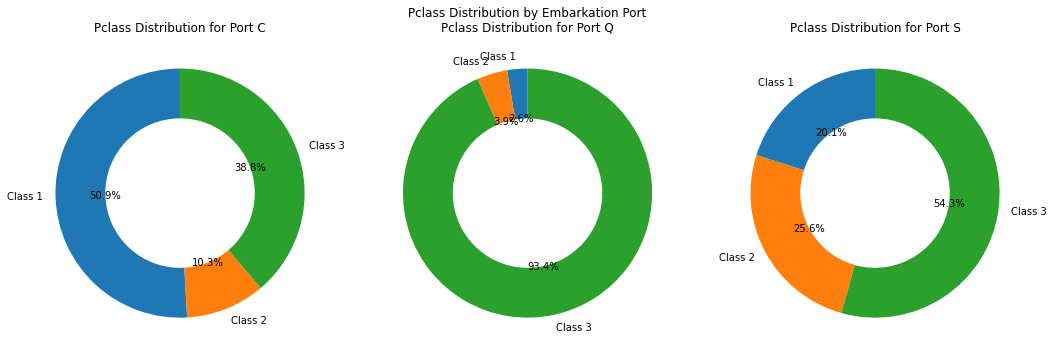

In [15]:
ports = ['C', 'Q', 'S']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, port in enumerate(ports):
    port_df = traindf[traindf[port] == 1]
    pclass_counts = port_df['Pclass'].value_counts().sort_index()
    wedges, texts, autotexts = axes[i].pie(
        pclass_counts,
        labels=[f'Class {int(cls)}' for cls in pclass_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4)  # Donut chart
    )
    axes[i].set_title(f"Pclass Distribution for Port {port[-1]}")

plt.suptitle("Pclass Distribution by Embarkation Port")
plt.tight_layout()
plt.show()

## 2. Choosing the Model

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df_male = traindf[traindf['PriorityGroup'] == 0].copy()
df_priority = traindf[traindf['PriorityGroup'] == 1].copy()
y_male = df_male["Survived"]
X_male = df_male.drop(["Sex", "Survived", "PriorityGroup"], axis=1)

y_priority = df_priority["Survived"]
X_priority = df_priority.drop(["Sex","Survived", "PriorityGroup"], axis=1)
male = X_male.values
priority = X_priority.values


In [17]:
male_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_male = GridSearchCV(
    estimator=male_model,
    param_grid=param_grid,
    cv=5,                   
    scoring='accuracy',      
    verbose=1,
    n_jobs=-1              
)

grid_search_male.fit(male, y_male)

print("Best parameters:", grid_search_male.best_params_)
print("Best score:", grid_search_male.best_score_)

C:\Users\juanc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\juanc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\juanc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.8431087151841868


In [18]:
priority_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=priority_model,
    param_grid=param_grid,
    cv=5,                   
    scoring='accuracy',      
    verbose=1,
    n_jobs=-1              
)

grid_search.fit(priority, y_priority)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\juanc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\juanc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.841614906832298


<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     529 non-null    int64  
 1   Age        529 non-null    float64
 2   Fare       529 non-null    float64
 3   Cabin      529 non-null    int64  
 4   C          529 non-null    uint8  
 5   Q          529 non-null    uint8  
 6   S          529 non-null    uint8  
 7   Companion  529 non-null    int64  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 26.3 KB


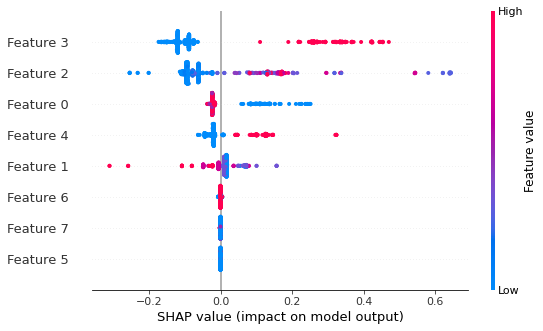

In [19]:
import shap
X_male.info()
best_male_model = grid_search_male.best_estimator_
explainer = shap.TreeExplainer(best_male_model.get_booster())
shap_values = explainer.shap_values(male)

shap.summary_plot(shap_values, male)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     529 non-null    int64  
 1   Age        529 non-null    float64
 2   Fare       529 non-null    float64
 3   Cabin      529 non-null    int64  
 4   C          529 non-null    uint8  
 5   Q          529 non-null    uint8  
 6   S          529 non-null    uint8  
 7   Companion  529 non-null    int64  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 26.3 KB


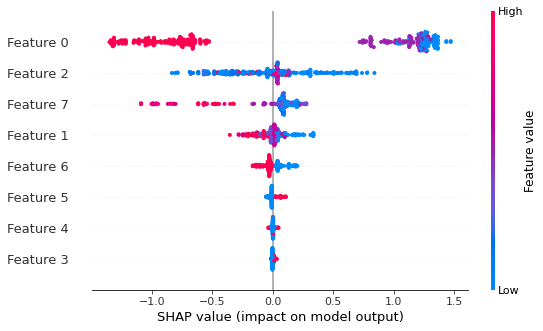

In [20]:
import shap
X_male.info()
best_model = grid_search.best_estimator_
explainer = shap.TreeExplainer(best_model.get_booster())
shap_values = explainer.shap_values(priority)

shap.summary_plot(shap_values, priority)

## 3. Applying the model to the test file

In [21]:
data = pd.read_csv("test.csv")
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data = data.drop(["Name"], axis=1)
data = data.drop_duplicates()

df_dummies = pd.get_dummies(data['Embarked'])
data = pd.concat([data, df_dummies], axis=1)
data = data.drop(["Embarked"], axis=1)
data['Cabin'] = data['Cabin'].isna().apply(lambda x: 0 if x else 1)

data = data.drop(["Ticket"],axis=1)
data.tail()

features_for_imputation = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
df_knn = data[features_for_imputation].copy()
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_knn)
df_imputed = pd.DataFrame(df_imputed_array, columns=features_for_imputation, index=data.index)
data.loc[data['Age'].isna(), 'Age'] = df_imputed.loc[data['Age'].isna(), 'Age']

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        418 non-null    int64  
 8   C            418 non-null    uint8  
 9   Q            418 non-null    uint8  
 10  S            418 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 30.6 KB


In [23]:
data['PriorityGroup'] = data.apply(priority_group, axis=1)
data['Companion'] = data["SibSp"] + data["Parch"]
data = data.drop("SibSp", axis=1)
data = data.drop("Parch", axis=1)

In [28]:
df_male = data[data['PriorityGroup'] == 0].copy()
MaleId = df_male["PassengerId"]
X_male = df_male.drop(["PassengerId", "Sex", "PriorityGroup"], axis=1)
male = X_male.values
MaleId = MaleId.reset_index(drop=True)
male_pred = best_male_model.predict(male)
df = pd.DataFrame(male_pred)
df.rename(columns ={0:'Survived'}, inplace=True)
value_counts = df_male['Cabin'].value_counts()
print(value_counts)
MaleId = pd.concat([MaleId, df], axis=1)
MaleId.tail()

0    219
1     47
Name: Cabin, dtype: int64


,PassengerId,Survived
261,1299,0
262,1305,0
263,1307,0
264,1308,0
265,1309,0


In [25]:
df_priority = data[data['PriorityGroup'] == 1].copy()
PriorityId = df_priority["PassengerId"]
PriorityId = PriorityId.reset_index(drop=True)
X_male = df_priority.drop(["PassengerId", "Sex", "PriorityGroup"], axis=1)
male = X_male.values
male_pred = best_model.predict(male)
df = pd.DataFrame(male_pred, columns=['Survived'])
value_counts = df['Survived'].value_counts()
print(value_counts)
PriorityId = pd.concat([PriorityId, df], axis=1)
PriorityId.tail()

1    117
0     35
Name: Survived, dtype: int64


,PassengerId,Survived
147,1301,0
148,1302,1
149,1303,1
150,1304,0
151,1306,1


In [26]:
df_combined = pd.concat([PriorityId, MaleId])
df_sorted = df_combined.sort_values(by='PassengerId', ascending=True).reset_index(drop=True)

df_sorted.to_csv('filename.csv', index=False)

In [27]:
df_sorted.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
